In [23]:
from flask import Flask
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, accuracy_score

In [24]:
# read the data and put it into a dataframe called bank_notes
bank_notes = pd.read_csv('bank_note_data.csv')
bank_notes

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [25]:
# Summary statistics
bank_notes.describe()

# Count of non-null values in each column
bank_notes.info()

# Value counts of categorical columns
bank_notes['Class'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image.Var   1372 non-null   float64
 1   Image.Skew  1372 non-null   float64
 2   Image.Curt  1372 non-null   float64
 3   Entropy     1372 non-null   float64
 4   Class       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


0    762
1    610
Name: Class, dtype: int64

In [26]:
# Check for missing values in the entire DataFrame
bank_notes.isnull().sum()

# Drop rows with missing values
#bank_notes.dropna(inplace=True)

Image.Var     0
Image.Skew    0
Image.Curt    0
Entropy       0
Class         0
dtype: int64

In [27]:
# Fill missing values with mean for numerical columns
bank_notes.fillna(bank_notes.mean(), inplace=True)
bank_notes

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


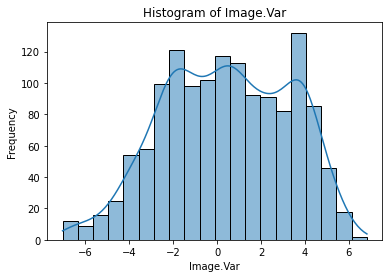

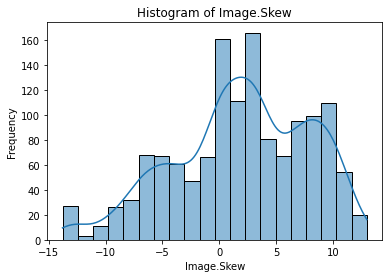

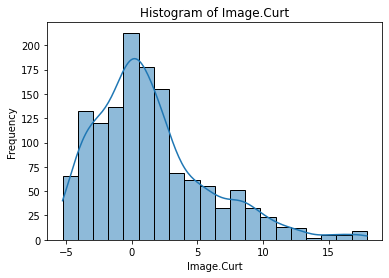

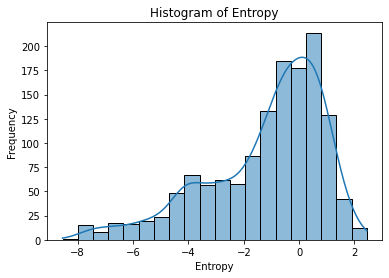

In [28]:
# Histograms of numerical columns
sns.histplot(bank_notes['Image.Var'], bins=20, kde=True)
plt.xlabel('Image.Var')
plt.ylabel('Frequency')
plt.title('Histogram of Image.Var')
plt.show()

sns.histplot(bank_notes['Image.Skew'], bins=20, kde=True)
plt.xlabel('Image.Skew')
plt.ylabel('Frequency')
plt.title('Histogram of Image.Skew')
plt.show()

sns.histplot(bank_notes['Image.Curt'], bins=20, kde=True)
plt.xlabel('Image.Curt')
plt.ylabel('Frequency')
plt.title('Histogram of Image.Curt')
plt.show()

sns.histplot(bank_notes['Entropy'], bins=20, kde=True)
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.title('Histogram of Entropy')
plt.show()

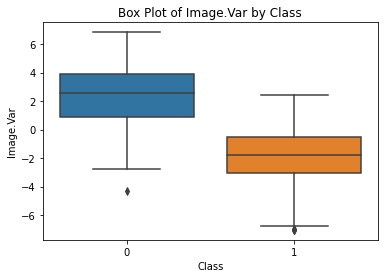

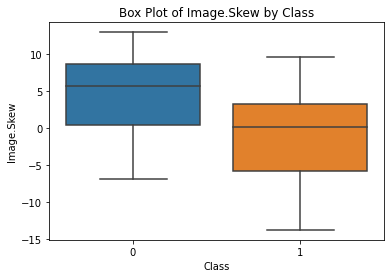

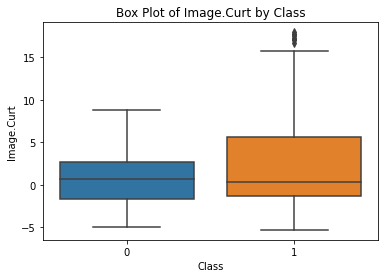

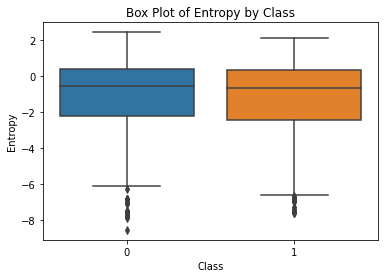

In [29]:
# Box plots of numerical columns, grouped by Class
sns.boxplot(x='Class', y='Image.Var', data=bank_notes)
plt.xlabel('Class')
plt.ylabel('Image.Var')
plt.title('Box Plot of Image.Var by Class')
plt.show()

sns.boxplot(x='Class', y='Image.Skew', data=bank_notes)
plt.xlabel('Class')
plt.ylabel('Image.Skew')
plt.title('Box Plot of Image.Skew by Class')
plt.show()

sns.boxplot(x='Class', y='Image.Curt', data=bank_notes)
plt.xlabel('Class')
plt.ylabel('Image.Curt')
plt.title('Box Plot of Image.Curt by Class')
plt.show()

sns.boxplot(x='Class', y='Entropy', data=bank_notes)
plt.xlabel('Class')
plt.ylabel('Entropy')
plt.title('Box Plot of Entropy by Class')
plt.show()

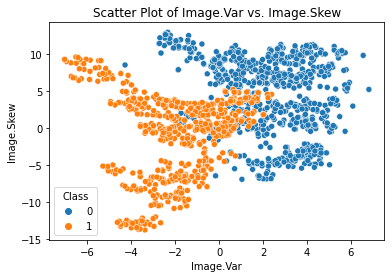

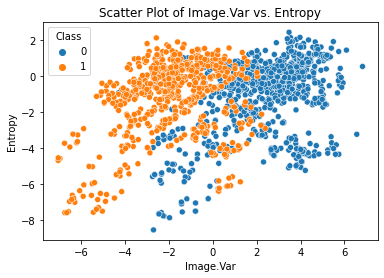

In [30]:
# Scatter plots of numerical columns
sns.scatterplot(x='Image.Var', y='Image.Skew', hue='Class', data=bank_notes)
plt.xlabel('Image.Var')
plt.ylabel('Image.Skew')
plt.title('Scatter Plot of Image.Var vs. Image.Skew')
plt.show()

sns.scatterplot(x='Image.Var', y='Entropy', hue='Class', data=bank_notes)
plt.xlabel('Image.Var')
plt.ylabel('Entropy')
plt.title('Scatter Plot of Image.Var vs. Entropy')
plt.show()

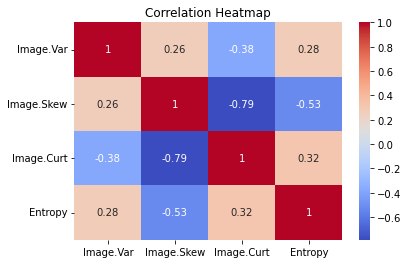

In [31]:
# Correlation heatmap
sns.heatmap(bank_notes[['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

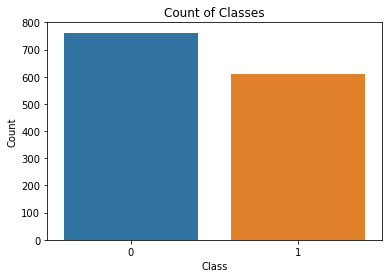

In [32]:
# Bar chart of Class column
sns.countplot(x='Class', data=bank_notes)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Classes')
plt.show()

In [33]:
train, test = train_test_split(bank_notes, test_size = 0.3, shuffle = True)

In [34]:
bank_notes.columns

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy', 'Class'], dtype='object')

In [35]:
training_features = ['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy']
target = 'Class'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [36]:
XGBModel = XGBRegressor()
XGBModel.fit(train_X, train_Y, verbose = False)

predictions = XGBModel.predict(test_X)
adj_predictions = []
for prediction in predictions:
    adj_predictions.append(round(prediction))
predictions = np.array(adj_predictions)

cf_matrix = confusion_matrix(np.array(test_Y), predictions)
cf_matrix

array([[224,   2],
       [  5, 181]])

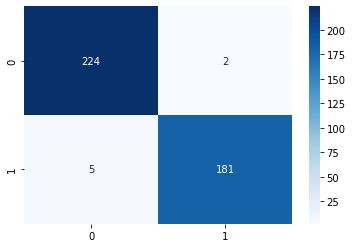

In [37]:
ax = sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')

In [38]:
accuracy_score(np.array(test_Y), predictions)

0.9830097087378641